# Airline Passenger Satisfaction - EDA
----
### Import data and describe

In [ ]:
import pandas as pd

dataset_path = 'airline_passenger_satisfaction.csv'
dataset = pd.read_csv(dataset_path)
dataset.describe()

### Analysis
- We see the first column represents the id, so we take that column out

In [ ]:
X = dataset.drop(['Unnamed: 0'], axis=1)
X.describe()

- check columns with any missing values

In [21]:
# Get names of columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing) # result: ['arrival_delay_in_minutes']
print(len(X['arrival_delay_in_minutes'][X['arrival_delay_in_minutes'].isnull()])) # how many values are missing

['arrival_delay_in_minutes']
393


### Categorical Values
- We detect which columns hold categorical values, so we can decide how to encode them

In [ ]:
categorical_columns = X.select_dtypes(include=['object'])
categorical_columns.head(10)

### Analysis
- We have 4 categorical features in our dataset (plus the result). Now we need to know how many possible values each can take.

In [ ]:
different_values = categorical_columns.nunique(axis=0)
print(different_values)

- We see there are 4 categorical features, with no more than 3 unique values each. So, given that none of them is a clear candidate for being weighted, we decide to use one-hot encoding in all of them.
----
### Looking for strong correlations
- We use pairwise correlation function to check if two features show strong correlation. For the top values (< 0.9), we use plots to visualize the data and actually see it.

In [13]:
# 1 means same signal; 0 means no correlation at all
corr_table = X.corr(method='pearson').abs()

# Get the highest values != 1
corr_coef = corr_table.unstack()
sorted_coef = corr_coef[corr_coef < 1].sort_values(kind='quicksort', ascending=False)
print(sorted_coef)

arrival_delay_in_minutes    departure_delay_in_minutes           0.965291
departure_delay_in_minutes  arrival_delay_in_minutes             0.965291
ease_of_online_booking      inflight_wifi_service                0.714807
inflight_wifi_service       ease_of_online_booking               0.714807
cleanliness                 inflight_entertainment               0.692511
                                                                   ...   
food_and_drink              departure_arrival_time_convenient    0.000687
age                         gate_location                        0.000398
gate_location               age                                  0.000398
                            inflight_service                     0.000310
inflight_service            gate_location                        0.000310
Length: 306, dtype: float64


- arrival_delay_in_minutes and departure_delay_in_minutes have the highest correlation rate (0.965291), which semantically makes sense; all other variables are less than 75% correlated. Regardless, we decide not to remove any feature.
- NOTE: satisfaction (the label we will try to predict) is not strongly correlated (>0.7) with any of the other features.
- said correlation can be visualized next:

/home/ivankras/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


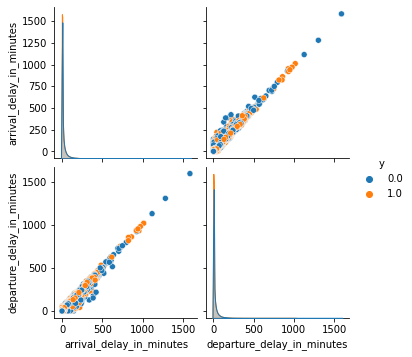

In [12]:
import seaborn as sns
import numpy as np
X_plot = X[['arrival_delay_in_minutes', 'departure_delay_in_minutes']]
X_plot['y'] = np.random.choice([1., 0.], size=len(X_plot))
sns.pairplot(X_plot, hue='y')